# Minimum degree

In [10]:
import numpy as np

def to_adj_list(X):
    n, m = X.shape
    out_X = {i : set() for i in range(n)}
    for i in range(n):
        for j in range(m):
            if X[i][j] != 0 and i != j:
                out_X[i].add(j)
    return out_X

In [11]:
X = np.array([[1, True, True, True, True],
               [True, 2, 0, 0, 0],
               [True, 0, 3, 0, 0],
               [True, 0, 0, 4, 0],
               [True, 0, 0, 0, 5]])

In [12]:
def min_deg_ang(X):
    n, m = X.shape
    X_adj = to_adj_list(X)

    permutation = []
    for k in range(n):
        p = float('inf')
        v_min = 0
        for v_id, neighbours in X_adj.items():
            if(p > len(neighbours)):
                p = len(neighbours)
                v_min = v_id

        for v_id in X_adj.keys():
            X_adj[v_id] =  X_adj[v_id].difference({v_min})

        for niegh in X_adj[v_min]: #żeby nie odciąć reszty grafu
            X_adj[niegh] = X_adj[niegh].union(X_adj[v_min].difference({niegh}))

        X_adj.pop(v_min)
        permutation.append(v_min)

    return X[permutation][:, permutation], permutation

min_deg_ang(X)

(array([[2, 0, 0, 1, 0],
        [0, 3, 0, 1, 0],
        [0, 0, 4, 1, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 1, 5]]),
 [1, 2, 3, 0, 4])

# Cuthill-McKee

In [13]:
from IPython.display import display
import graphviz

def show_graph(matrix):
    n = matrix.shape[0]
    dot = graphviz.Graph()

    for i in range(n):
        dot.node(str(i))

    for i in range(n):
        for j in range(i+1, n):
            if matrix[i][j] != 0:
                dot.edge(str(i), str(j))

    dot.graph_attr['rankdir'] = 'LR'
    dot.graph_attr['splines'] = 'true'    
    display(dot)

def find_min_deg(degrees, visited):
    min_degree = float('inf')
    min_degree_node = None
    for node in range(len(degrees)):
        if node not in visited and degrees[node] < min_degree:
            min_degree = degrees[node]
            min_degree_node = node

    return min_degree_node


def cuthill_mckee(A, start_node=-1):
    n = A.shape[0]
    
    degrees = [0 for _ in range(n)]
    adj_list = to_adj_list(A)

    for i, node in enumerate(adj_list):        
        adj_list[node] = sorted(adj_list[node], key=lambda node: len(adj_list[node]))
        degrees[i] = len(adj_list[i])

    perm = []
    visited = set()
    queue = []
    
    # in case we want to start from a specific node, default is this with min degree
    if start_node != -1:
        perm.append(start_node)
        visited.add(start_node)
        queue.append(start_node)

    while len(perm) < n:
        if len(queue) == 0:
            current_node = find_min_deg(degrees, visited)
            perm.append(current_node)
            visited.add(current_node)
        else:
            current_node = queue.pop()



        neighbors = adj_list[current_node]
        # Sort neighbors by degree - already sorted before bfs-like algorithm to make the calculation faster
        # neighbors = sorted(neighbors, key=lambda node: len(adj_list[node]))

        for next_node in neighbors:
            if next_node not in visited:
                perm.append(next_node)
                visited.add(next_node)
                queue.append(next_node)
    
    return A[perm][:, perm], perm


def show_cmk_results(matrix):
    permuted_matrix, perm = cuthill_mckee(matrix)
    print("Original Matrix:")
    print(matrix)
    print("\nPermutation Array:")
    print(perm)
    print("\nPermuted Matrix:")
    print(permuted_matrix)
    show_graph(matrix)


In [14]:
def reverse_cuthill_mckee(A, start_node=-1):
    permuted_matrix, perm = cuthill_mckee(A, start_node)
    reverse_perm = list(reversed(perm))
    return permuted_matrix[:, reverse_perm][reverse_perm], reverse_perm

def show_rcm_results(matrix):
    permuted_matrix, reverse_perm = reverse_cuthill_mckee(matrix)
    print("Original Matrix:")
    print(matrix)
    print("\nReverse Permutation Array:")
    print(reverse_perm)
    print("\nReversed Permuted Matrix:")
    print(permuted_matrix)
    show_graph(matrix)

Original Matrix:
[[0 1 1 0 0]
 [1 0 0 1 1]
 [1 0 0 1 0]
 [0 1 1 0 1]
 [0 1 0 1 0]]

Permutation Array:
[0, 2, 1, 4, 3]

Permuted Matrix:
[[0 1 1 0 0]
 [1 0 0 0 1]
 [1 0 0 1 1]
 [0 0 1 0 1]
 [0 1 1 1 0]]


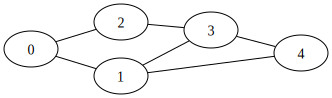

Original Matrix:
[[0 1 1 0 0]
 [1 0 0 1 1]
 [1 0 0 1 0]
 [0 1 1 0 1]
 [0 1 0 1 0]]

Reverse Permutation Array:
[3, 4, 1, 2, 0]

Reversed Permuted Matrix:
[[0 1 0 1 0]
 [1 0 1 1 0]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 0 1 1 0]]


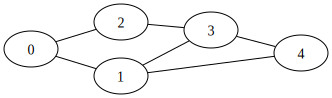

In [15]:
sparse_matrix = np.array([[0, 1, 1, 0, 0],
                          [1, 0, 0, 1, 1],
                          [1, 0, 0, 1, 0],
                          [0, 1, 1, 0, 1],
                          [0, 1, 0, 1, 0]])

show_cmk_results(sparse_matrix)

show_rcm_results(sparse_matrix)

Original Matrix:
[[0 1 0 0 0 0 1 0 1 0]
 [1 0 0 0 1 0 1 0 0 1]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 1 0]
 [0 1 1 1 0 1 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0 0]]

Permutation Array:
[2, 6, 4, 5, 3, 9, 1, 0, 8, 7]

Permuted Matrix:
[[0 1 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 1 0 0]
 [1 0 0 1 1 1 1 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 1 0 0 1]
 [0 1 1 0 0 1 0 1 0 0]
 [0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 1 0 0 1 0]]


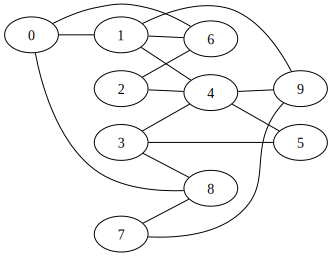

Original Matrix:
[[0 1 0 0 0 0 1 0 1 0]
 [1 0 0 0 1 0 1 0 0 1]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 1 0]
 [0 1 1 1 0 1 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [1 0 0 1 0 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0 0]]

Reverse Permutation Array:
[7, 8, 0, 1, 9, 3, 5, 4, 6, 2]

Reversed Permuted Matrix:
[[0 1 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 1 1]
 [0 1 0 0 0 1 0 0 0 1]
 [1 0 0 1 0 0 1 0 0 1]
 [0 0 1 0 0 1 1 1 1 0]]


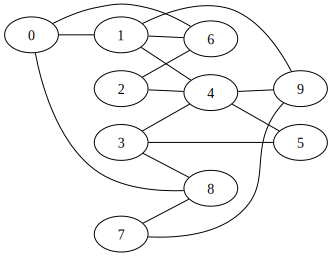

In [16]:
num_rows = 10
matrix = [[0] * num_rows for _ in range(num_rows)]
matrix[0] = [0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
matrix[1] = [1, 0, 0, 0, 1, 0, 1, 0, 0, 1]
matrix[2] = [0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
matrix[3] = [0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
matrix[4] = [0, 1, 1, 1, 0, 1, 0, 0, 0, 1]
matrix[5] = [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
matrix[6] = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
matrix[7] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
matrix[8] = [1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
matrix[9] = [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
sparse_matrix = np.array(matrix)

show_cmk_results(sparse_matrix)
show_rcm_results(sparse_matrix)


Matrix Size (2^(3k)): 64
Original Matrix :


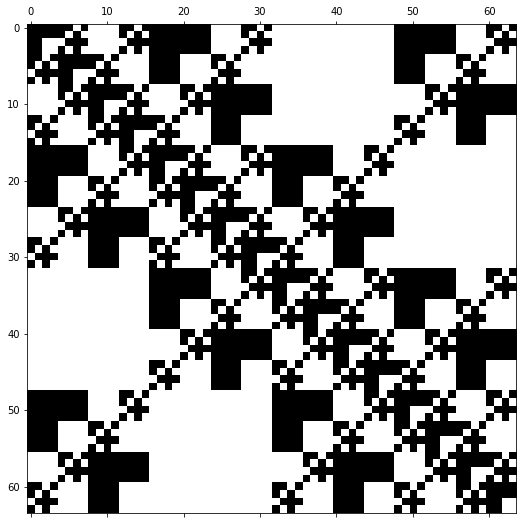

Minimum Degree Permutation Compression Ratio: 0.983419689119171
Minimum Degree Permutation:


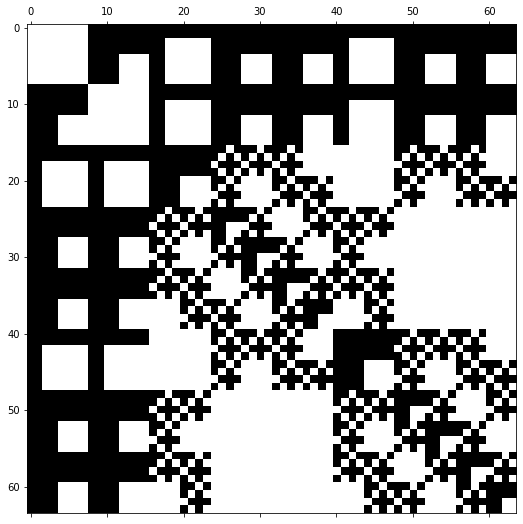

Cuthill-McKee Permutation Compression Ratio: 0.8922279792746114
Cuthill-McKee Permutation :


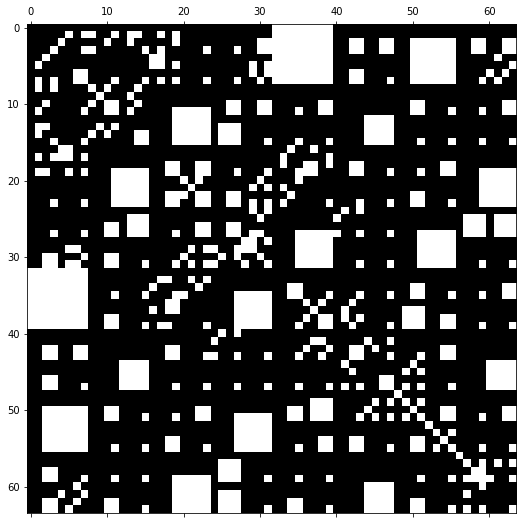

Reversed Cuthill-McKee Permutation Compression Ratio: 0.672538860103627
Reversed Cuthill-McKee Permutation :


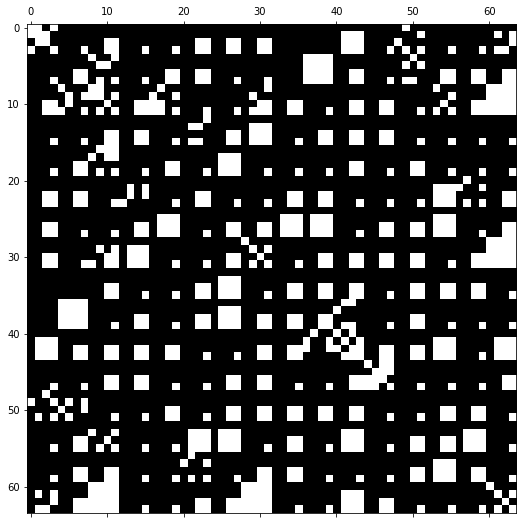


Matrix Size (2^(3k)): 512
Original Matrix :


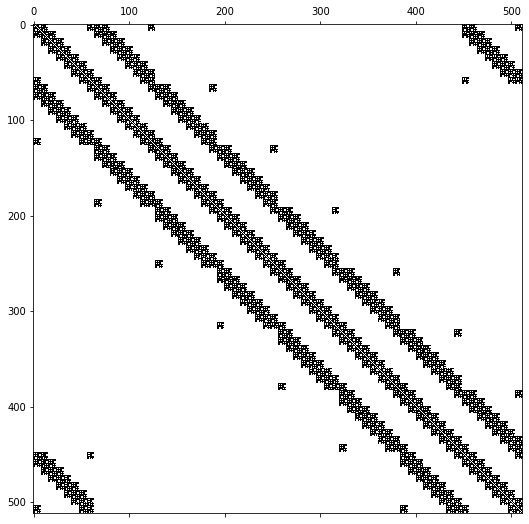

Minimum Degree Permutation Compression Ratio: 0.6671163225070043
Minimum Degree Permutation:


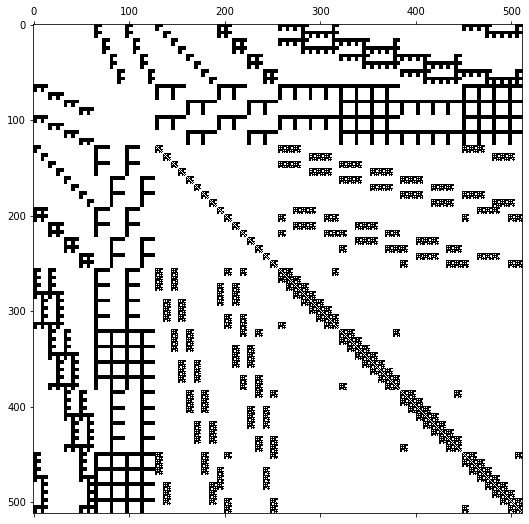

Cuthill-McKee Permutation Compression Ratio: 0.48822247587423473
Cuthill-McKee Permutation :


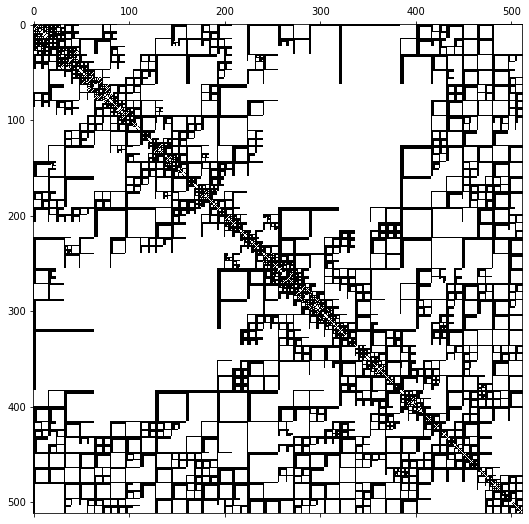

Reversed Cuthill-McKee Permutation Compression Ratio: 0.5288990349693888
Reversed Cuthill-McKee Permutation :


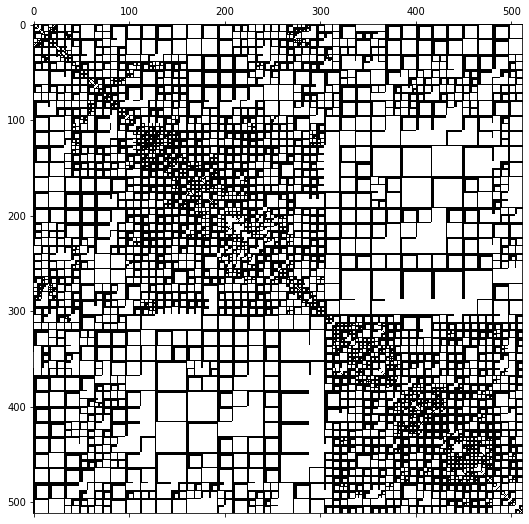

In [21]:
from compress import *
import random


# def generate_3d_grid_matrix(k):
#     special = [-1, -16, -4, 0, 1, 16, 4]

#     size = 2**(3*k)
#     two_d_array = np.zeros((size, size))
#     for i in range(size):
#         for j in special:
#             if i+j > 0 and i+j < size:
#                 rand_val = random.uniform(0, 1)
#                 two_d_array[i][i + j] = rand_val
#     return two_d_array

def generate_3d_grid_matrix(k):
    size = 2 ** (3 * k)
    matrix = np.zeros((size, size), dtype=int)

    for i in range(size):
        x = i // (2 ** (2 * k))
        y = (i % (2 ** (2 * k))) // (2 ** k)
        z = i % (2 ** k)

        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                for dz in [-1, 0, 1]:
                    if (dx, dy, dz) != (0, 0, 0):
                        nx, ny, nz = (x + dx) % (2 ** k), (y + dy) % (2 ** k), (z + dz) % (2 ** k)
                        neighbor_index = nx * (2 ** (2 * k)) + ny * (2 ** k) + nz
                        matrix[i, neighbor_index] = 1

    return matrix


def permute_matrix(matrix, permutation_func):
    permuted_matrix, permutation= permutation_func(matrix)
    return permuted_matrix

def compare_compression(matrix_before, matrix_after):
    original_size = matrix_before.count_nodes()
    compressed_size = matrix_after.count_nodes()
    compression_ratio = compressed_size/original_size
    return compression_ratio

def main():
    for k in range(2, 4):
        epsilon = 0.11
        r = 4
        matrix = generate_3d_grid_matrix(k)
  

        print(f"\nMatrix Size (2^(3k)): {2**(3*k)}")

        # Original Matrix Compression
        compressed_matrix = compress_matrix(matrix, epsilon, r)
        print(f"Original Matrix :")
        compressed_matrix.draw_matrix()
        

        # Permutation using Minimum Degree
        min_degree_permuted_matrix = permute_matrix(matrix, min_deg_ang)
        compressed_min_degree = compress_matrix(min_degree_permuted_matrix, epsilon, r)
        min_degree_ratio = compare_compression(compressed_matrix, compressed_min_degree)
        print(f"Minimum Degree Permutation Compression Ratio: {min_degree_ratio}")
        print(f"Minimum Degree Permutation:")
        compressed_min_degree.draw_matrix()

        # Permutation using Cuthill-McKee
        cuthill_mckee_permuted_matrix = permute_matrix(matrix, cuthill_mckee)
        compressed_cuthill_mckee = compress_matrix(cuthill_mckee_permuted_matrix, epsilon, r)
        cuthill_mckee_ratio = compare_compression(compressed_matrix, compressed_cuthill_mckee)
        print(f"Cuthill-McKee Permutation Compression Ratio: {cuthill_mckee_ratio}")
        print(f"Cuthill-McKee Permutation :")
        compressed_cuthill_mckee.draw_matrix()
        

        # Permutation using Reversed Cuthill-McKee
        rev_cuthill_mckee_permuted_matrix = permute_matrix(matrix, reverse_cuthill_mckee)
        compressed_rev_cuthill_mckee = compress_matrix(rev_cuthill_mckee_permuted_matrix, epsilon, r)
        rev_cuthill_mckee_ratio = compare_compression(compressed_matrix, compressed_rev_cuthill_mckee)
        print(f"Reversed Cuthill-McKee Permutation Compression Ratio: {rev_cuthill_mckee_ratio}")
        print(f"Reversed Cuthill-McKee Permutation :")
        compressed_rev_cuthill_mckee.draw_matrix()

main()
